# 종합 탐색적 데이터 분석 (EDA)

## 1. 데이터 로딩 및 전처리

In [1]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
import matplotlib.font_manager as fm
warnings.filterwarnings('ignore')

# 시각화 스타일 설정
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Noto Sans KR'
plt.rcParams['axes.unicode_minus'] = False

print(f'현재 폰트: {plt.rcParams["font.family"]}')

현재 폰트: ['Noto Sans KR']


In [2]:
# 데이터 로딩
products_df = pd.read_parquet('data/products_with_features.parquet')
reviews_df = pd.read_parquet('data/reviews_with_features.parquet')
promotion = pd.read_csv('data/csv/promotion.csv')

print("=" * 50)
print("데이터 로딩 완료")
print("=" * 50)
print(f"\n상품 데이터: {products_df.shape[0]:,}행 x {products_df.shape[1]}열")
print(f"리뷰 데이터: {reviews_df.shape[0]:,}행 x {reviews_df.shape[1]}열")
print(f"프로모션 데이터: {promotion.shape[0]:,}행 x {promotion.shape[1]}열")

데이터 로딩 완료

상품 데이터: 868행 x 19열
리뷰 데이터: 312,139행 x 28열
프로모션 데이터: 118행 x 4열


In [3]:
# 사용 가능한 컬럼 확인
print("\n=== Products DataFrame 컬럼 ===")
for i, col in enumerate(products_df.columns, 1):
    print(f"{i:2d}. {col}")

print("\n=== Reviews DataFrame 컬럼 ===")
for i, col in enumerate(reviews_df.columns, 1):
    print(f"{i:2d}. {col}")


=== Products DataFrame 컬럼 ===
 1. product_code
 2. category_home
 3. category_1
 4. category_2
 5. brand
 6. name
 7. price
 8. country
 9. likes
10. shares
11. group
12. review_count
13. engagement_score
14. price_tier
15. relative_price_ratio
16. price_position
17. cp_index
18. is_god_sung_bi
19. review_density

=== Reviews DataFrame 컬럼 ===
 1. product_code
 2. date
 3. user_masked
 4. user
 5. rating
 6. text
 7. image_count
 8. user_id
 9. order_id
10. review_length
11. review_length_category
12. is_reorder
13. user_total_reviews
14. user_activity_level
15. user_avg_rating_reorder
16. user_rating_tendency
17. is_brand_repurchase
18. is_category_repurchase
19. year
20. month
21. day_of_week
22. day_name
23. season
24. first_review_date
25. days_since_first_review
26. is_new_product
27. is_during_promo
28. promo_type_category


In [4]:
# 데이터 미리보기
print("\n" + "=" * 50)
print("[상품 데이터 샘플]")
print("=" * 50)
print(products_df.head())
print("\n[상품 데이터 정보]")
print(products_df.info())
print("\n[상품 데이터 기술통계]")
print(products_df.describe())


[상품 데이터 샘플]
   product_code category_home category_1 category_2 brand  \
0       1056665         뷰티/위생       스킨케어     기초스킨케어   해서린   
1       1061468         뷰티/위생       메이크업    베이스메이크업   드롭비   
2       1061451         뷰티/위생       메이크업   치크/하이라이터   드롭비   
3       1061454         뷰티/위생       메이크업    베이스메이크업   드롭비   
4       1061450         뷰티/위생       메이크업   치크/하이라이터   드롭비   

                            name  price country  likes  shares  group  \
0          해서린 스팟 케어 클리어 젤 10 ml   3000      한국   2814      24    해서린   
1        [04 커버 베이지] 드롭비 컬러즈 컨실팟   3000      한국    188       2  한국화장품   
2        [04 쉐딩 브론저] 드롭비 컬러즈쉐딩스틱   5000      한국   2731      45  한국화장품   
3        [03 살몬 베이지] 드롭비 컬러즈 컨실팟   3000      한국    403      11  한국화장품   
4  [03 블러셔 로지 베리] 드롭비 컬러즈 블러셔 스틱   5000      한국   1330      21  한국화장품   

   review_count  engagement_score      price_tier  relative_price_ratio  \
0           224            552.50  Standard (Mid)              0.666667   
1           164            119.

In [5]:
print("\n" + "=" * 50)
print("[리뷰 데이터 샘플]")
print("=" * 50)
print(reviews_df.head())
print("\n[리뷰 데이터 정보]")
print(reviews_df.info())
print("\n[리뷰 데이터 기술통계]")
print(reviews_df.describe())


[리뷰 데이터 샘플]
   product_code       date user_masked       user  rating  \
0       1048275 2024-01-01    ths*****  user_3614       5   
1       1049275 2024-01-01   chl******  user_2737       5   
2       1049275 2024-01-01    tkd*****  user_2958       5   
3       1049276 2024-01-01    tkd*****  user_2958       5   
4       1048273 2024-01-02      zoo***  user_2065       5   

                                                text  image_count  user_id  \
0             다크 커버하려고 구매했어요 엄청 잘 가려지는 느낌은 아니지만 무난해요            0        1   
1  오픈런 할 자신은 없어서 재고 있을때 운좋게 구매했어요 전 넘 잘맞아서 진짜 쟁이고...            0        2   
2  재구매 운좋게 재구매해서 사용중입니다\n지금은 늘~ 품절이라 구매 어려워요 ㅠ\n제...            0        3   
3  재구매 약간 따끔하지만 참을만 합니다\n건성피부인데 촉촉해져서 기분이 좋아요~\n자...            0        3   
4                             너무 만족해서 다른 컬러로 또 구매했어요            0        4   

   order_id  review_length  ...  year  month  day_of_week day_name  season  \
0         1             38  ...  2024      1            0   Monday  Winte

### 분석 목적: 프로모션 효과 분석

**분석 목적:**
- 프로모션 기간과 비프로모션 기간의 리뷰 차이 분석
- 프로모션이 평점 및 리뷰 품질에 미치는 영향 평가
- 효과적인 프로모션 유형 식별

**기대 결과:**
- ROI 높은 프로모션 전략 도출
- 프로모션 타이밍 최적화
- 프로모션별 타겟 고객층 매칭


In [6]:
print("\n" + "=" * 50)
print("[프로모션 데이터 샘플]")
print("=" * 50)
print(promotion.head())
print("\n[프로모션 데이터 정보]")
print(promotion.info())

# 날짜 변환
promotion['date'] = pd.to_datetime(promotion['date'])


[프로모션 데이터 샘플]
         date     description brand event_type
0  2024-09-11      다이소데이뷰티풀충전    VT      리뷰이벤트
1  2024-09-11      다이소데이뷰티풀충전   CNP      리뷰이벤트
2  2024-11-13  오늘은다이소데이뷰티신상대전   메디필      구매이벤트
3  2024-11-13  오늘은다이소데이뷰티신상대전    쿤달      리뷰이벤트
4  2025-01-21  다이소데이뷰티신상집중포커스    VT      리뷰이벤트

[프로모션 데이터 정보]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         118 non-null    object
 1   description  118 non-null    object
 2   brand        118 non-null    object
 3   event_type   118 non-null    object
dtypes: object(4)
memory usage: 3.8+ KB
None


### 2.4 카테고리별 Engagement Score 비교


**분석 목적:**
- 전체 제품의 Engagement Score 분포 패턴 파악

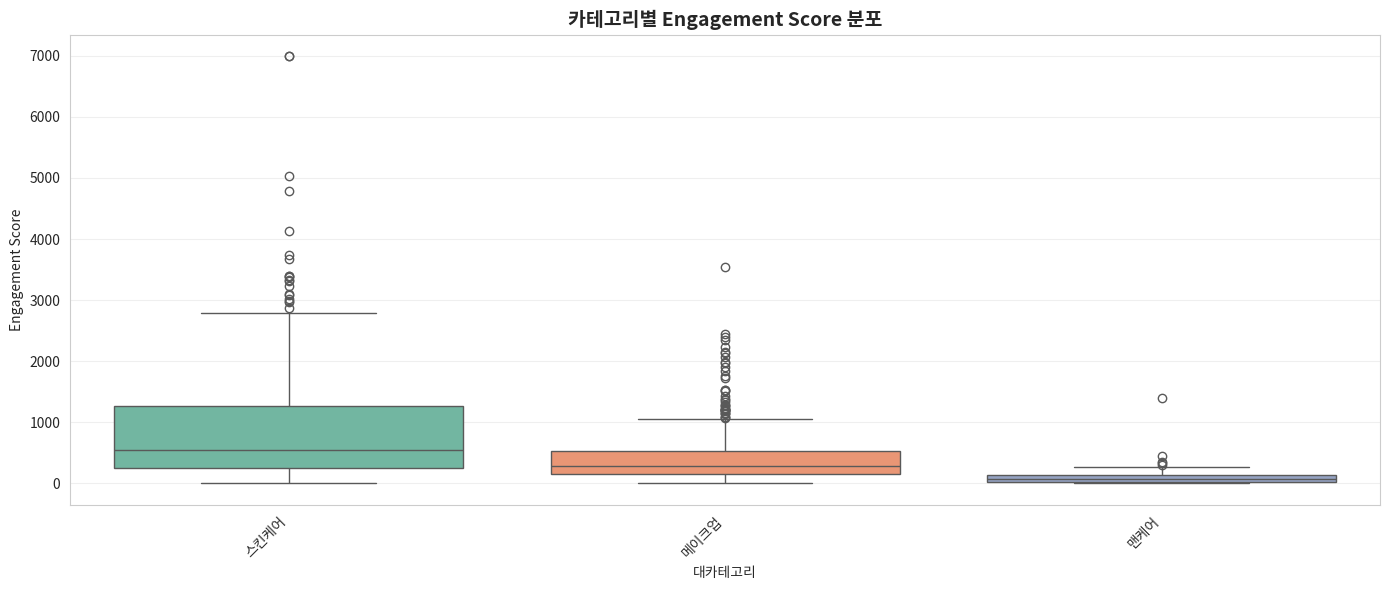


[카테고리별 Engagement Score 통계]
                  mean  median         std  count
category_1                                       
스킨케어        909.392693  554.30  993.729400    349
메이크업        433.286996  281.15  449.884767    446
맨케어         110.243151   76.85  177.863449     73


In [7]:
# 카테고리별 Engagement Score 박스플롯
plt.figure(figsize=(14, 6))

# 카테고리별로 정렬
category_order = products_df.groupby('category_1')['engagement_score'].median().sort_values(ascending=False).index

sns.boxplot(data=products_df, x='category_1', y='engagement_score', order=category_order, palette='Set2')
plt.xticks(rotation=45, ha='right')
plt.xlabel('대카테고리')
plt.ylabel('Engagement Score')
plt.title('카테고리별 Engagement Score 분포', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 카테고리별 통계
category_stats = products_df.groupby('category_1')['engagement_score'].agg(['mean', 'median', 'std', 'count'])
category_stats = category_stats.sort_values('median', ascending=False)

print("\n[카테고리별 Engagement Score 통계]")
print(category_stats)

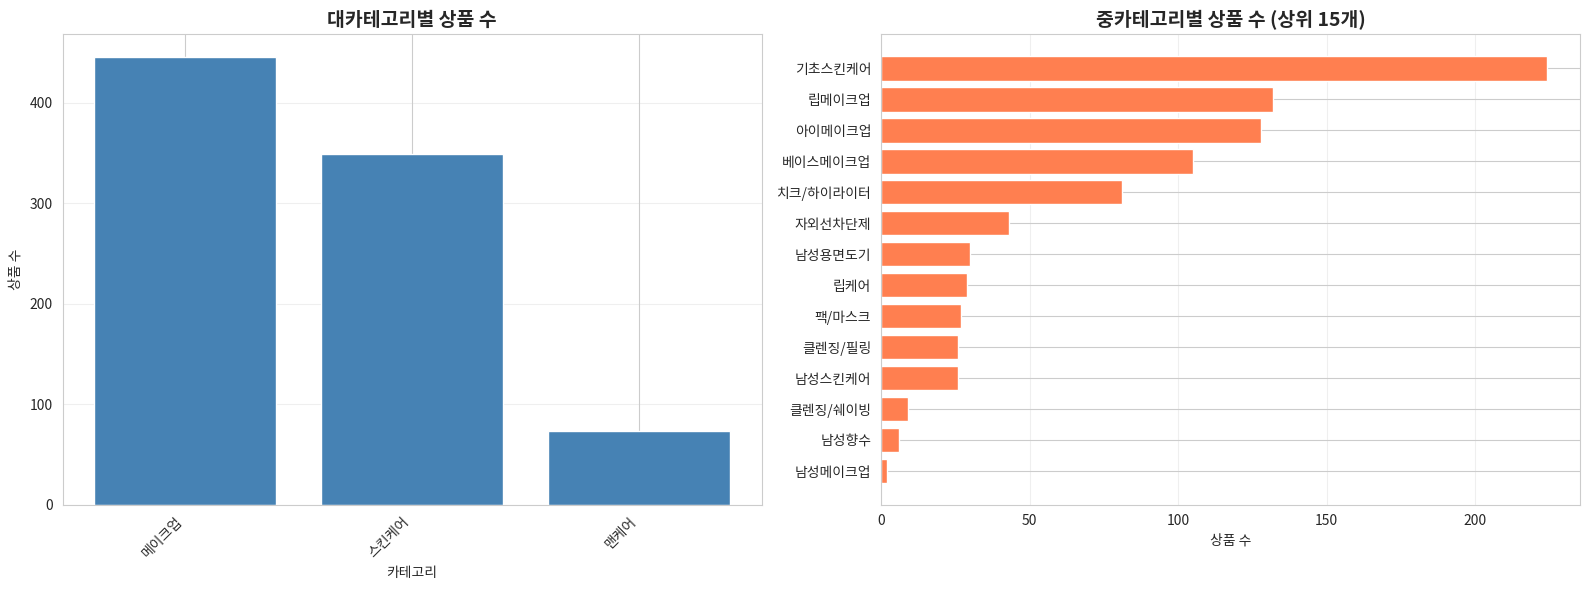


[대카테고리별 상품 수]
category_1
메이크업    446
스킨케어    349
맨케어      73
Name: count, dtype: int64

총 대카테고리 수: 3
총 중카테고리 수: 14


In [8]:
# 대카테고리별 상품 수
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 대카테고리
cat1_counts = products_df['category_1'].value_counts()
axes[0].bar(range(len(cat1_counts)), cat1_counts.values, color='steelblue')
axes[0].set_xticks(range(len(cat1_counts)))
axes[0].set_xticklabels(cat1_counts.index, rotation=45, ha='right')
axes[0].set_title('대카테고리별 상품 수', fontsize=14, fontweight='bold')
axes[0].set_xlabel('카테고리')
axes[0].set_ylabel('상품 수')
axes[0].grid(axis='y', alpha=0.3)

# 중카테고리 (상위 15개)
cat2_counts = products_df['category_2'].value_counts().head(15)
axes[1].barh(range(len(cat2_counts)), cat2_counts.values, color='coral')
axes[1].set_yticks(range(len(cat2_counts)))
axes[1].set_yticklabels(cat2_counts.index)
axes[1].set_title('중카테고리별 상품 수 (상위 15개)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('상품 수')
axes[1].invert_yaxis()
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n[대카테고리별 상품 수]")
print(cat1_counts)
print(f"\n총 대카테고리 수: {products_df['category_1'].nunique()}")
print(f"총 중카테고리 수: {products_df['category_2'].nunique()}")

### 2.6 Engagement Score 설명 요인

**분석 목적:**
- 전체 제품의 Engagement Score 분포 패턴 파악



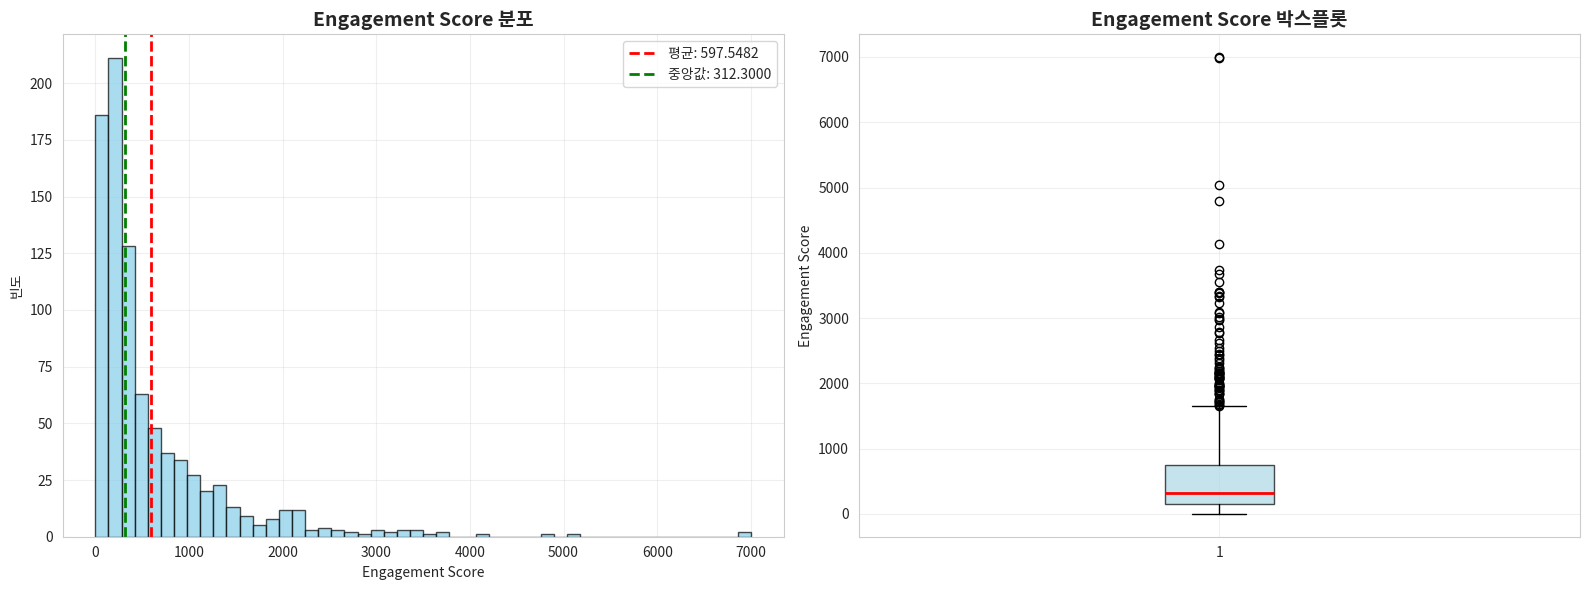


[Engagement Score 통계]
count     868.000000
mean      597.548157
std       758.877897
min         0.000000
25%       158.450000
50%       312.300000
75%       756.375000
max      6998.300000
Name: engagement_score, dtype: float64

왜도(Skewness): 3.1902
첨도(Kurtosis): 15.8274


In [9]:
# Engagement Score 분포 시각화
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram
axes[0].hist(products_df['engagement_score'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].axvline(products_df['engagement_score'].mean(), color='red', linestyle='--', linewidth=2, label=f'평균: {products_df["engagement_score"].mean():.4f}')
axes[0].axvline(products_df['engagement_score'].median(), color='green', linestyle='--', linewidth=2, label=f'중앙값: {products_df["engagement_score"].median():.4f}')
axes[0].set_title('Engagement Score 분포', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Engagement Score')
axes[0].set_ylabel('빈도')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Boxplot
axes[1].boxplot(products_df['engagement_score'], vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightblue', alpha=0.7),
                medianprops=dict(color='red', linewidth=2))
axes[1].set_title('Engagement Score 박스플롯', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Engagement Score')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n[Engagement Score 통계]")
print(products_df['engagement_score'].describe())
print(f"\n왜도(Skewness): {products_df['engagement_score'].skew():.4f}")
print(f"첨도(Kurtosis): {products_df['engagement_score'].kurtosis():.4f}")

## 3. 가격 관점 분석


**분석 목적:**
- 브랜드별 평균 Engagement Score 비교


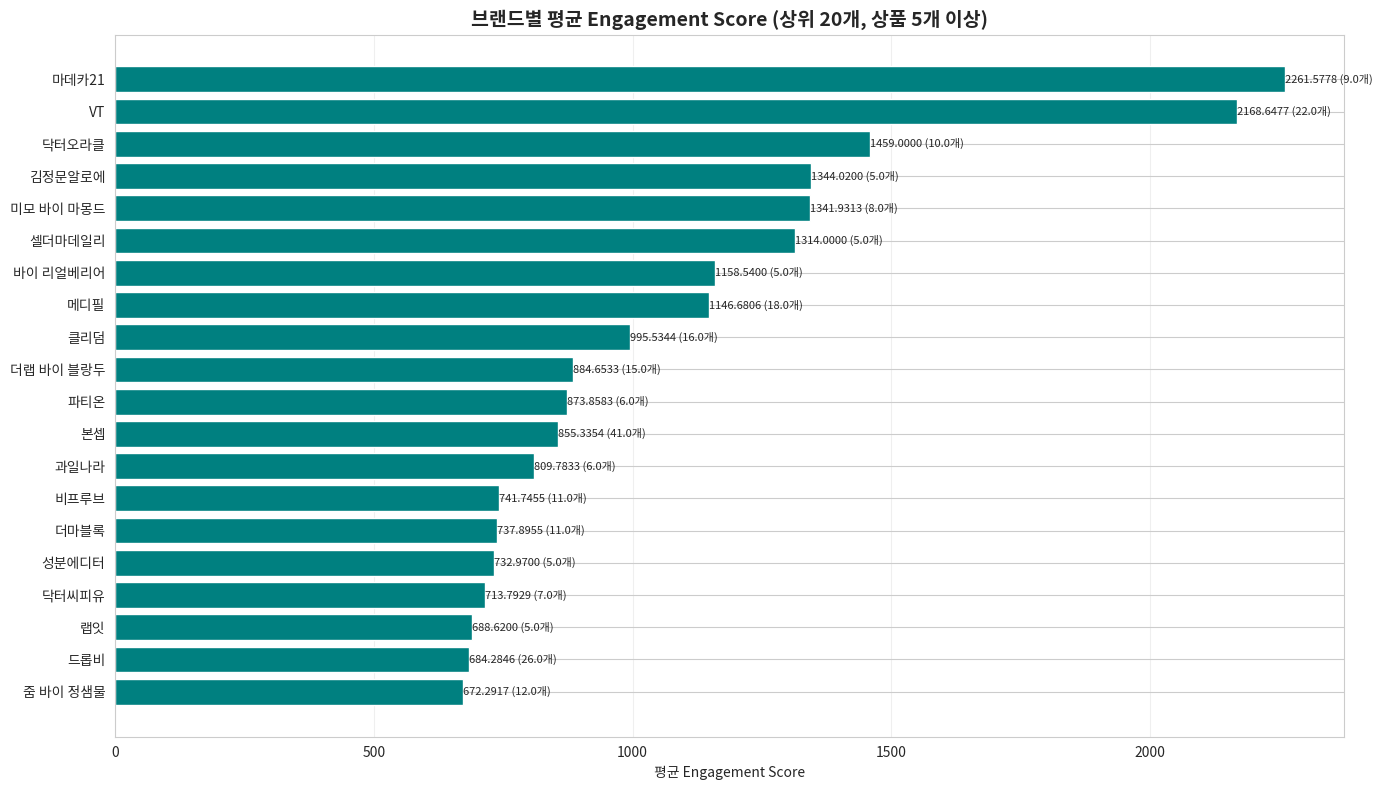


[상위 10개 브랜드]
           engagement_score  product_count
brand                                     
마데카21           2261.577778              9
VT              2168.647727             22
닥터오라클           1459.000000             10
김정문알로에          1344.020000              5
미모 바이 마몽드       1341.931250              8
셀더마데일리          1314.000000              5
바이 리얼베리어        1158.540000              5
메디필             1146.680556             18
클리덤              995.534375             16
더랩 바이 블랑두        884.653333             15


In [10]:
# 브랜드별 평균 Engagement Score (상위 20개)
brand_engagement = products_df.groupby('brand').agg({
    'engagement_score': 'mean',
    'product_code': 'count'
}).rename(columns={'product_code': 'product_count'})

# 상품이 5개 이상인 브랜드만 선택
brand_engagement = brand_engagement[brand_engagement['product_count'] >= 5]
brand_engagement = brand_engagement.sort_values('engagement_score', ascending=False).head(20)

plt.figure(figsize=(14, 8))
bars = plt.barh(range(len(brand_engagement)), brand_engagement['engagement_score'].values, color='teal')
plt.yticks(range(len(brand_engagement)), brand_engagement.index)
plt.xlabel('평균 Engagement Score')
plt.title('브랜드별 평균 Engagement Score (상위 20개, 상품 5개 이상)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)

# 값 표시
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, 
             f'{width:.4f} ({brand_engagement.iloc[i]["product_count"]}개)',
             ha='left', va='center', fontsize=8)

plt.tight_layout()
plt.show()

print("\n[상위 10개 브랜드]")
print(brand_engagement.head(10))

**분석 목적:**
- CP Index(가성비 지표)와 Engagement Score의 관계 분석


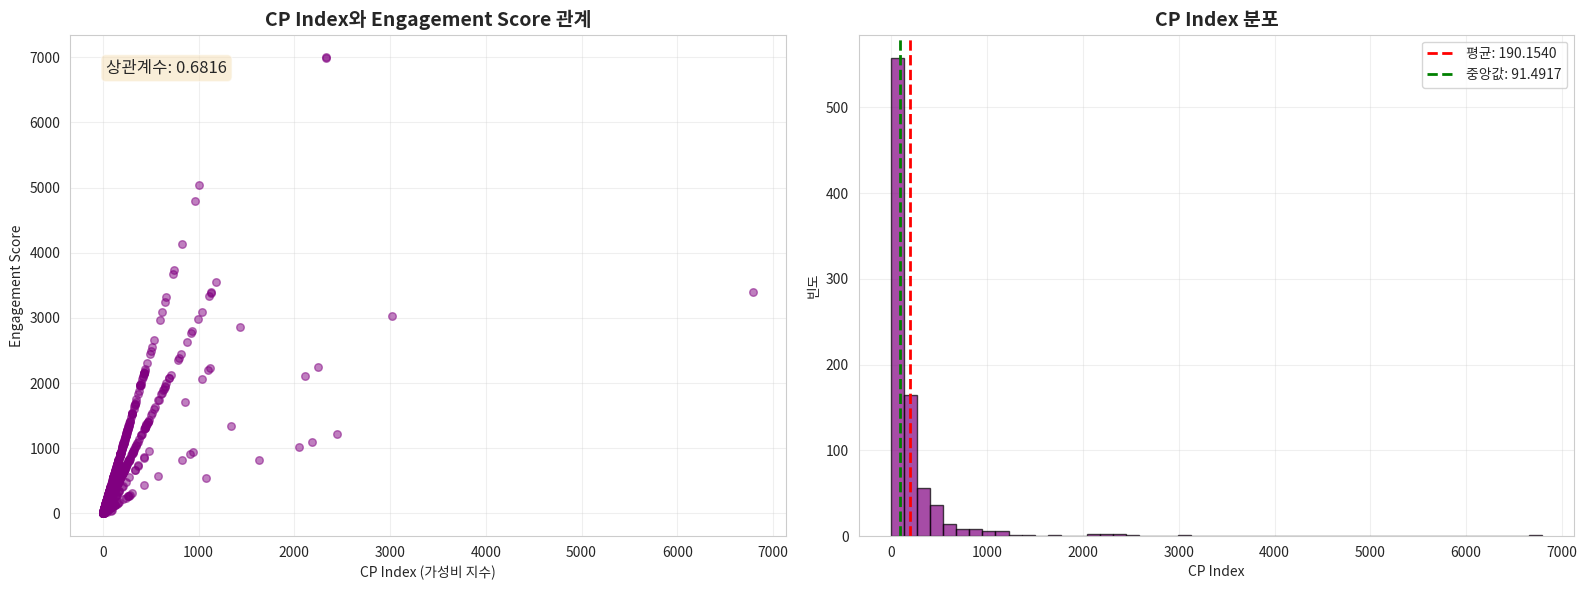


[CP Index 통계]
count     868.000000
mean      190.153998
std       370.302217
min         0.000000
25%        42.555000
50%        91.491667
75%       204.985000
max      6791.700000
Name: cp_index, dtype: float64

CP Index와 Engagement Score 상관계수: 0.6816


In [11]:
# CP Index와 Engagement Score의 관계
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot
axes[0].scatter(products_df['cp_index'], products_df['engagement_score'], alpha=0.5, s=30, color='purple')
axes[0].set_xlabel('CP Index (가성비 지수)')
axes[0].set_ylabel('Engagement Score')
axes[0].set_title('CP Index와 Engagement Score 관계', fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3)

# 상관계수 표시
corr = products_df['cp_index'].corr(products_df['engagement_score'])
axes[0].text(0.05, 0.95, f'상관계수: {corr:.4f}', 
            transform=axes[0].transAxes, fontsize=12,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# CP Index 분포
axes[1].hist(products_df['cp_index'], bins=50, color='purple', edgecolor='black', alpha=0.7)
axes[1].axvline(products_df['cp_index'].mean(), color='red', linestyle='--', 
               linewidth=2, label=f'평균: {products_df["cp_index"].mean():.4f}')
axes[1].axvline(products_df['cp_index'].median(), color='green', linestyle='--', 
               linewidth=2, label=f'중앙값: {products_df["cp_index"].median():.4f}')
axes[1].set_xlabel('CP Index')
axes[1].set_ylabel('빈도')
axes[1].set_title('CP Index 분포', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n[CP Index 통계]")
print(products_df['cp_index'].describe())
print(f"\nCP Index와 Engagement Score 상관계수: {corr:.4f}")


**분석 목적:**
- 카테고리 내 가격 위치에 따른 Engagement 차이 분석


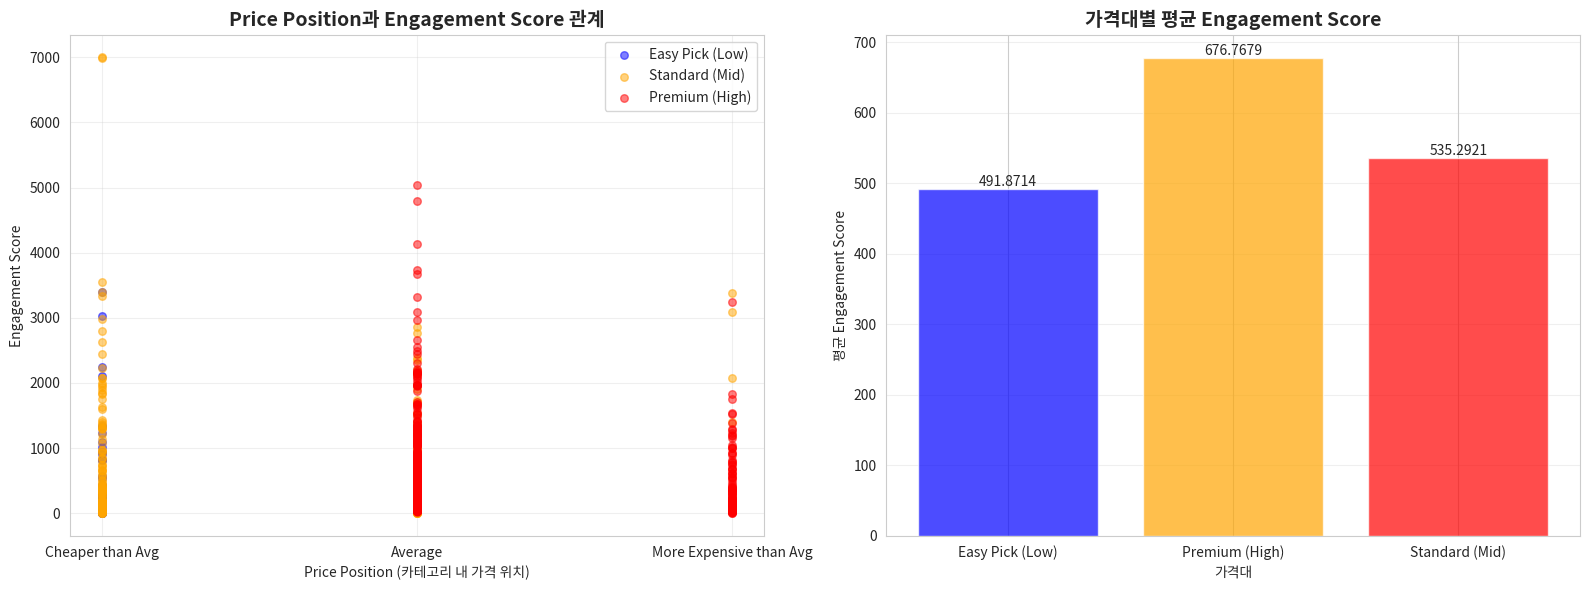


[가격대별 통계]
                engagement_score                      product_code
                            mean   median         std        count
price_tier                                                        
Easy Pick (Low)       491.871429  147.700  768.872024           49
Premium (High)        676.767884  391.900  742.346583          397
Standard (Mid)        535.292062  285.575  767.548935          422


In [12]:
# Price Position을 구간으로 나누기 (저가, 중가, 고가)

# Scatter plot with color by price tier
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot
for tier, color in zip(['Easy Pick (Low)', 'Standard (Mid)', 'Premium (High)'], ['blue', 'orange', 'red']):
    tier_data = products_df[products_df['price_tier'] == tier]
    axes[0].scatter(tier_data['price_position'], tier_data['engagement_score'], 
                   alpha=0.5, label=tier, color=color, s=30)

axes[0].set_xlabel('Price Position (카테고리 내 가격 위치)')
axes[0].set_ylabel('Engagement Score')
axes[0].set_title('Price Position과 Engagement Score 관계', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# 가격대별 평균 Engagement Score
tier_engagement = products_df.groupby('price_tier')['engagement_score'].mean()
bars = axes[1].bar(tier_engagement.index, tier_engagement.values, 
                   color=['blue', 'orange', 'red'], alpha=0.7)
axes[1].set_xlabel('가격대')
axes[1].set_ylabel('평균 Engagement Score')
axes[1].set_title('가격대별 평균 Engagement Score', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

# 값 표시
for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.4f}',
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

print("\n[가격대별 통계]")
tier_stats = products_df.groupby('price_tier').agg({
    'engagement_score': ['mean', 'median', 'std'],
    'product_code': 'count'
})
print(tier_stats)

**분석 목적:**
- 리뷰 길이 분포를 통한 고객 참여 수준 파악


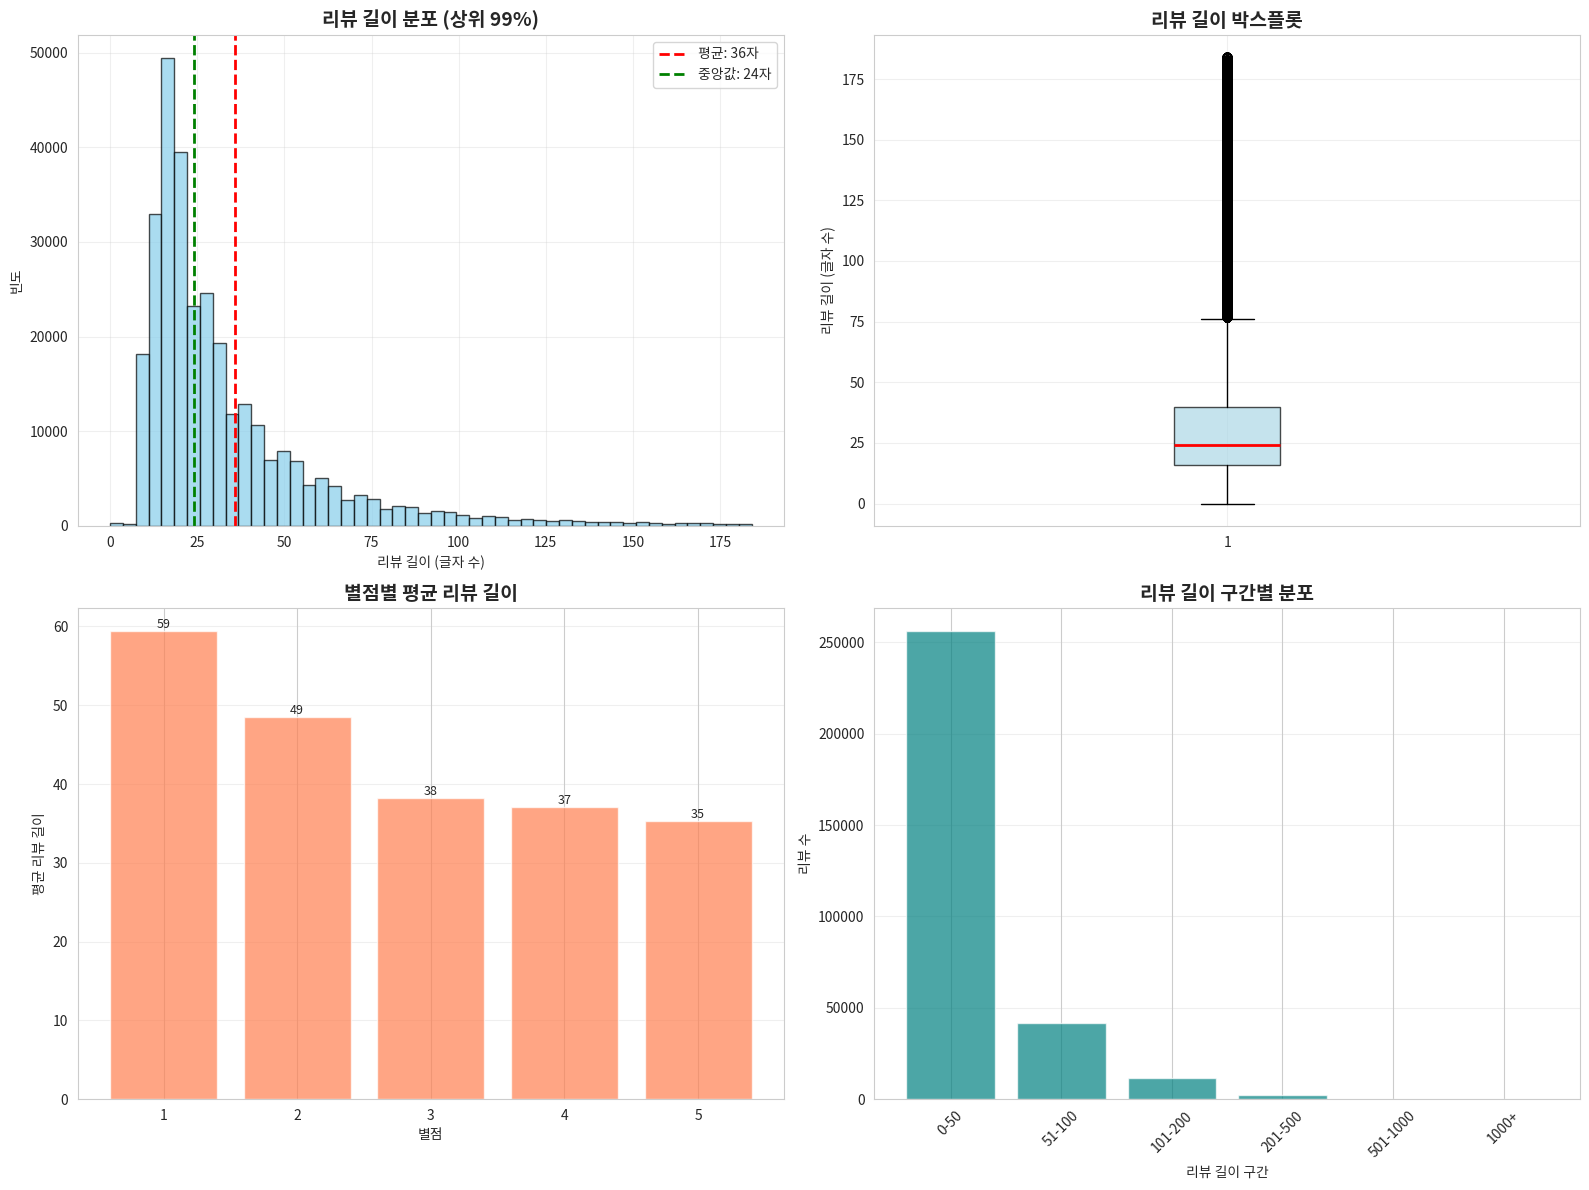


[리뷰 길이 통계]
count    312139.000000
mean         35.918232
std          37.240251
min           0.000000
25%          17.000000
50%          24.000000
75%          41.000000
max         996.000000
Name: review_length, dtype: float64

[별점별 평균 리뷰 길이]
rating
1    59.363593
2    48.530920
3    38.275026
4    37.093215
5    35.324716
Name: review_length, dtype: float64

[리뷰 길이 구간별 분포]
length_category
0-50        255997
51-100       41753
101-200      11823
201-500       2348
501-1000       141
1000+            0
Name: count, dtype: int64


In [13]:
# 리뷰 길이 분포
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 전체 분포 (상위 99%까지만 표시 - 극단값 제거)
length_99 = reviews_df['review_length'].quantile(0.99)
filtered_length = reviews_df[reviews_df['review_length'] <= length_99]['review_length']

axes[0, 0].hist(filtered_length, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(reviews_df['review_length'].mean(), color='red', linestyle='--', 
                   linewidth=2, label=f'평균: {reviews_df["review_length"].mean():.0f}자')
axes[0, 0].axvline(reviews_df['review_length'].median(), color='green', linestyle='--', 
                   linewidth=2, label=f'중앙값: {reviews_df["review_length"].median():.0f}자')
axes[0, 0].set_xlabel('리뷰 길이 (글자 수)')
axes[0, 0].set_ylabel('빈도')
axes[0, 0].set_title('리뷰 길이 분포 (상위 99%)', fontsize=14, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# 박스플롯
axes[0, 1].boxplot(filtered_length, vert=True, patch_artist=True,
                   boxprops=dict(facecolor='lightblue', alpha=0.7),
                   medianprops=dict(color='red', linewidth=2))
axes[0, 1].set_ylabel('리뷰 길이 (글자 수)')
axes[0, 1].set_title('리뷰 길이 박스플롯', fontsize=14, fontweight='bold')
axes[0, 1].grid(alpha=0.3)

# 별점별 평균 리뷰 길이
avg_length_by_rating = reviews_df.groupby('rating')['review_length'].mean()
bars = axes[1, 0].bar(avg_length_by_rating.index, avg_length_by_rating.values, 
                      color='coral', alpha=0.7)
axes[1, 0].set_xlabel('별점')
axes[1, 0].set_ylabel('평균 리뷰 길이')
axes[1, 0].set_title('별점별 평균 리뷰 길이', fontsize=14, fontweight='bold')
axes[1, 0].set_xticks(avg_length_by_rating.index)
axes[1, 0].grid(axis='y', alpha=0.3)

# 값 표시
for bar in bars:
    height = bar.get_height()
    axes[1, 0].text(bar.get_x() + bar.get_width()/2., height,
                   f'{height:.0f}',
                   ha='center', va='bottom', fontsize=9)

# 리뷰 길이 구간별 분포
length_bins = [0, 50, 100, 200, 500, 1000, float('inf')]
length_labels = ['0-50', '51-100', '101-200', '201-500', '501-1000', '1000+']
reviews_df['length_category'] = pd.cut(reviews_df['review_length'], bins=length_bins, labels=length_labels)
length_cat_counts = reviews_df['length_category'].value_counts().sort_index()

axes[1, 1].bar(range(len(length_cat_counts)), length_cat_counts.values, color='teal', alpha=0.7)
axes[1, 1].set_xticks(range(len(length_cat_counts)))
axes[1, 1].set_xticklabels(length_cat_counts.index, rotation=45)
axes[1, 1].set_xlabel('리뷰 길이 구간')
axes[1, 1].set_ylabel('리뷰 수')
axes[1, 1].set_title('리뷰 길이 구간별 분포', fontsize=14, fontweight='bold')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n[리뷰 길이 통계]")
print(reviews_df['review_length'].describe())
print("\n[별점별 평균 리뷰 길이]")
print(avg_length_by_rating)
print("\n[리뷰 길이 구간별 분포]")
print(length_cat_counts)

## 5. 시간/프로모션 분석

**분석 목적:**
- 전체 리뷰 중 재구매 리뷰 비율 파악



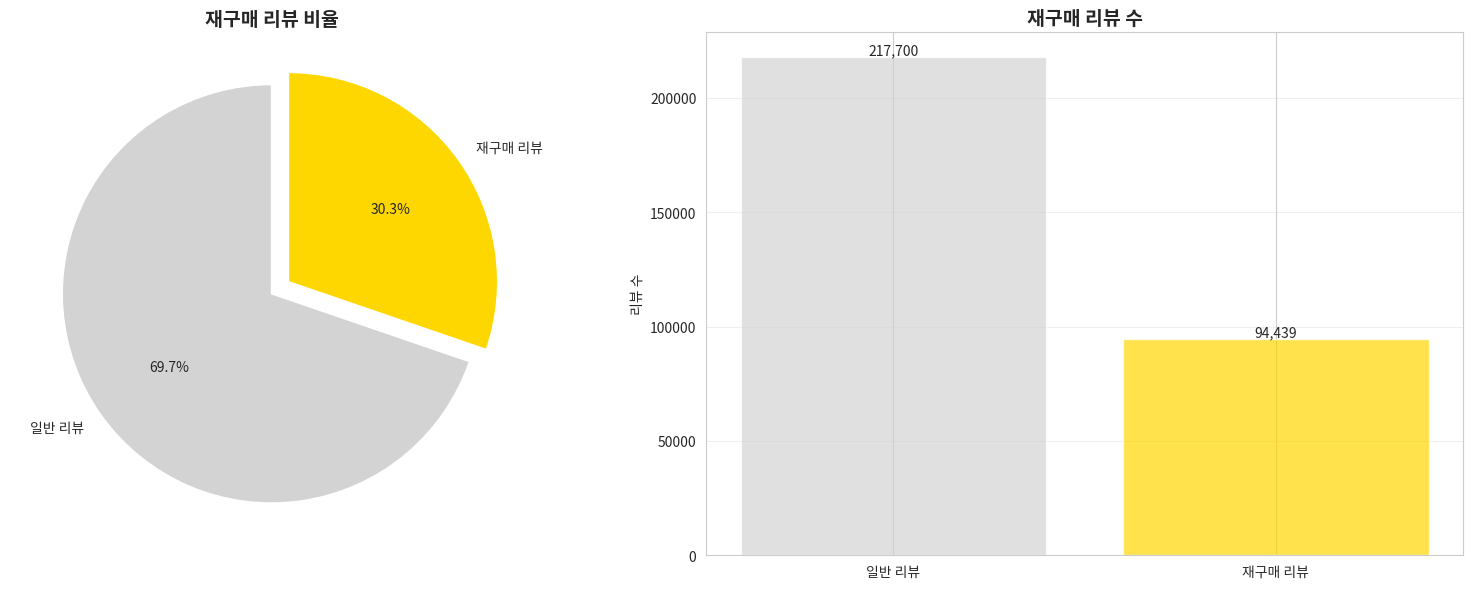


[재구매 리뷰 통계]
전체 리뷰 수: 312,139
재구매 리뷰 수: 94,439
재구매 비율: 30.26%


In [14]:
# 재구매 리뷰 비율
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 파이 차트
reorder_counts = reviews_df['is_reorder'].value_counts()
axes[0].pie(reorder_counts.values, labels=['일반 리뷰', '재구매 리뷰'], 
           autopct='%1.1f%%', colors=['lightgray', 'gold'],
           startangle=90, explode=[0, 0.1])
axes[0].set_title('재구매 리뷰 비율', fontsize=14, fontweight='bold')

# 막대그래프
bars = axes[1].bar(['일반 리뷰', '재구매 리뷰'], reorder_counts.values, 
                   color=['lightgray', 'gold'], alpha=0.7)
axes[1].set_ylabel('리뷰 수')
axes[1].set_title('재구매 리뷰 수', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

# 값 표시
for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{height:,}',
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

print("\n[재구매 리뷰 통계]")
print(f"전체 리뷰 수: {len(reviews_df):,}")
print(f"재구매 리뷰 수: {reviews_df['is_reorder'].sum():,}")
print(f"재구매 비율: {reviews_df['is_reorder'].mean() * 100:.2f}%")

## 6. 사용자 분석

In [15]:
# 사용자별 리뷰 수 - user_total_reviews 컬럼 사용
user_stats = reviews_df.groupby('user').agg({
    'product_code': 'count',
    'rating': 'mean',
    'is_reorder': 'mean',
    'review_length': 'mean'
}).rename(columns={
    'product_code': 'review_count',
    'rating': 'avg_rating',
    'is_reorder': 'reorder_rate',
    'review_length': 'avg_review_length'
})

# 상위 유저 (리뷰 20개 이상)
heavy_users = user_stats[user_stats['review_count'] >= 20].sort_values('review_count', ascending=False)

print("\n[헤비 유저 통계 (리뷰 20개 이상)]")
print(f"헤비 유저 수: {len(heavy_users):,}")
print(f"헤비 유저 평균 리뷰 수: {heavy_users['review_count'].mean():.1f}")
print(f"헤비 유저 평균 별점: {heavy_users['avg_rating'].mean():.2f}")
print(f"헤비 유저 평균 재구매율: {heavy_users['reorder_rate'].mean() * 100:.2f}%")

print("\n[일반 유저 통계]")
normal_users = user_stats[user_stats['review_count'] < 20]
print(f"일반 유저 수: {len(normal_users):,}")
print(f"일반 유저 평균 리뷰 수: {normal_users['review_count'].mean():.1f}")
print(f"일반 유저 평균 별점: {normal_users['avg_rating'].mean():.2f}")
print(f"일반 유저 평균 재구매율: {normal_users['reorder_rate'].mean() * 100:.2f}%")


[헤비 유저 통계 (리뷰 20개 이상)]
헤비 유저 수: 4,969
헤비 유저 평균 리뷰 수: 45.9
헤비 유저 평균 별점: 4.74
헤비 유저 평균 재구매율: 30.18%

[일반 유저 통계]
일반 유저 수: 14,878
일반 유저 평균 리뷰 수: 5.6
일반 유저 평균 별점: 4.73
일반 유저 평균 재구매율: 25.66%


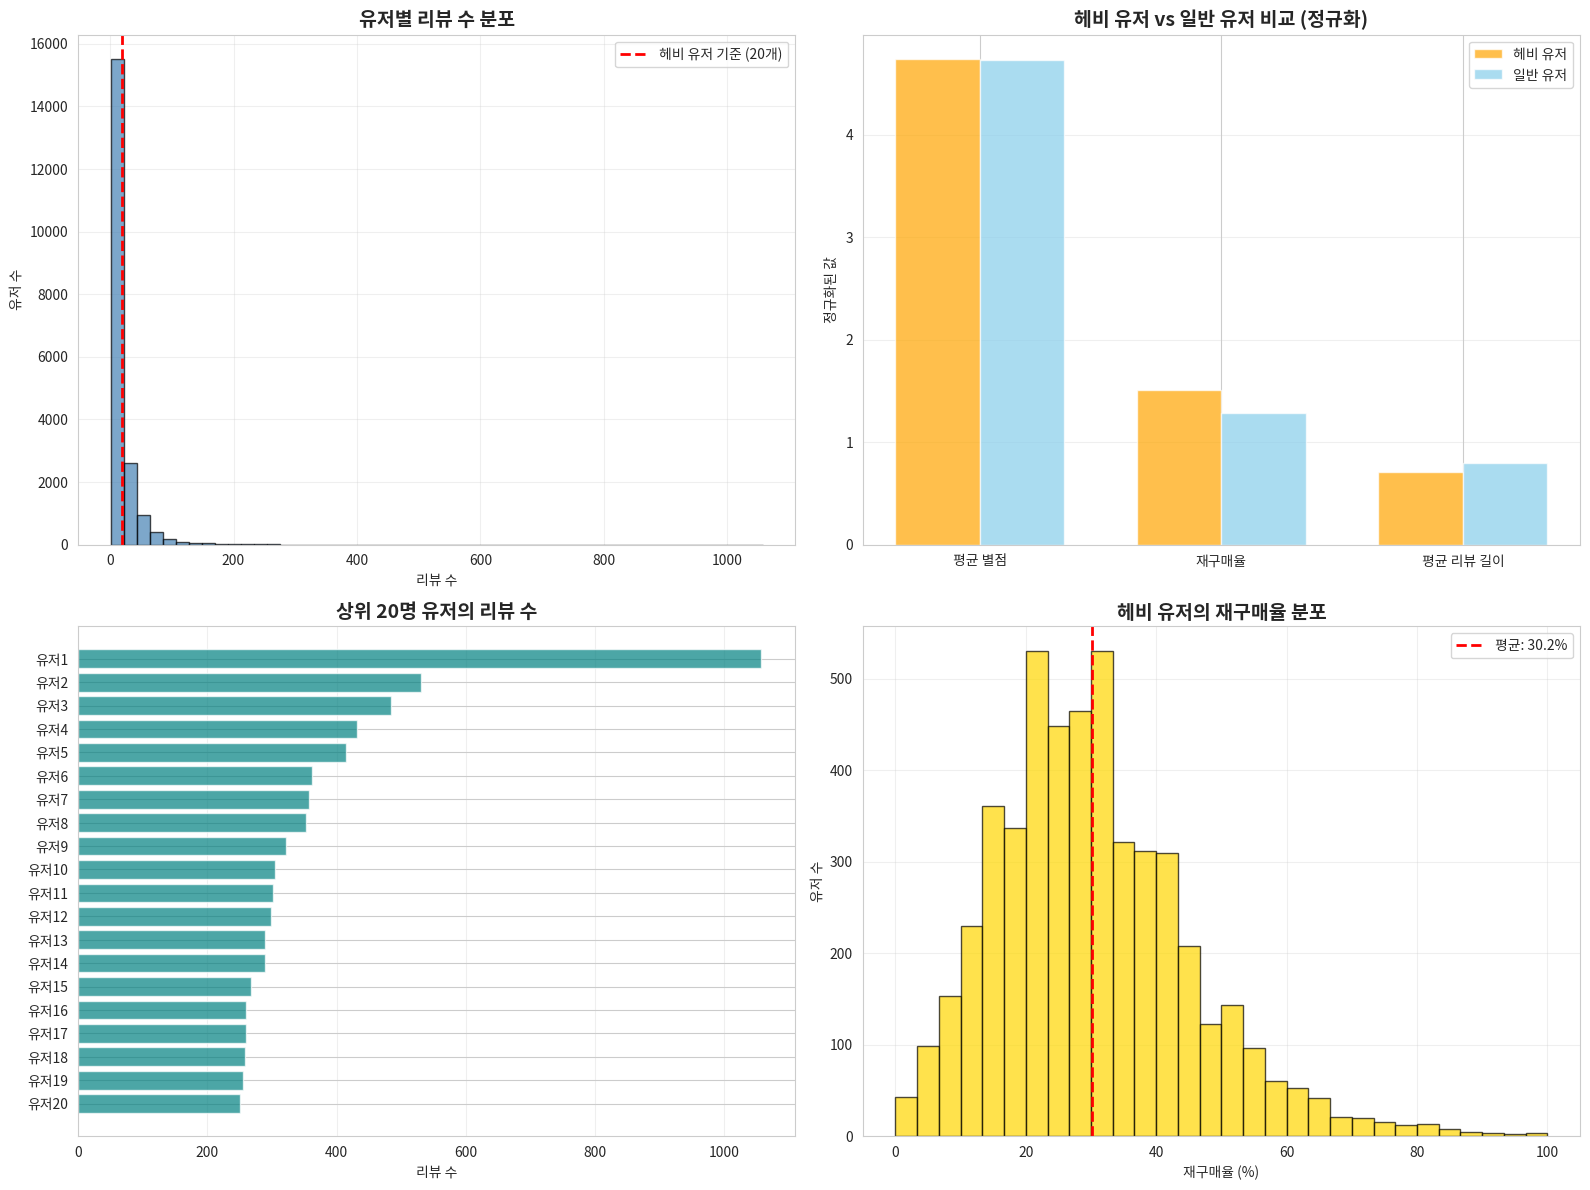


[상위 10명 유저 정보]
           review_count  avg_rating  reorder_rate  avg_review_length
user                                                                
user_0036          1057    4.870388      0.393567          35.093661
user_0431           531    4.892655      0.482109          35.101695
user_0812           485    4.758763      0.329897          46.045361
user_1677           431    4.658933      0.368910          37.473318
user_0191           415    4.730120      0.255422          35.696386
user_0327           362    4.767956      0.337017          30.486188
user_0381           357    4.854342      0.456583          30.613445
user_0734           353    4.841360      0.458924          28.351275
user_0387           322    4.863354      0.440994          36.204969
user_0199           305    4.796721      0.268852          39.013115


In [16]:
# 헤비 유저 vs 일반 유저 비교
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 리뷰 수 분포
axes[0, 0].hist(user_stats['review_count'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(20, color='red', linestyle='--', linewidth=2, label='헤비 유저 기준 (20개)')
axes[0, 0].set_xlabel('리뷰 수')
axes[0, 0].set_ylabel('유저 수')
axes[0, 0].set_title('유저별 리뷰 수 분포', fontsize=14, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# 평균 별점 비교
comparison_data = {
    '평균 별점': [heavy_users['avg_rating'].mean(), normal_users['avg_rating'].mean()],
    '재구매율 (%)': [heavy_users['reorder_rate'].mean() * 100, normal_users['reorder_rate'].mean() * 100],
    '평균 리뷰 길이': [heavy_users['avg_review_length'].mean(), normal_users['avg_review_length'].mean()]
}

x = np.arange(len(comparison_data))
width = 0.35

bars1 = axes[0, 1].bar(x - width/2, [comparison_data['평균 별점'][0], 
                                     comparison_data['재구매율 (%)'][0]/20, 
                                     comparison_data['평균 리뷰 길이'][0]/50],
                       width, label='헤비 유저', color='orange', alpha=0.7)
bars2 = axes[0, 1].bar(x + width/2, [comparison_data['평균 별점'][1], 
                                     comparison_data['재구매율 (%)'][1]/20, 
                                     comparison_data['평균 리뷰 길이'][1]/50],
                       width, label='일반 유저', color='skyblue', alpha=0.7)

axes[0, 1].set_ylabel('정규화된 값')
axes[0, 1].set_title('헤비 유저 vs 일반 유저 비교 (정규화)', fontsize=14, fontweight='bold')
axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels(['평균 별점', '재구매율', '평균 리뷰 길이'])
axes[0, 1].legend()
axes[0, 1].grid(axis='y', alpha=0.3)

# 상위 20명 유저 정보
top_20_users = heavy_users.head(20)
axes[1, 0].barh(range(len(top_20_users)), top_20_users['review_count'].values, color='teal', alpha=0.7)
axes[1, 0].set_yticks(range(len(top_20_users)))
axes[1, 0].set_yticklabels([f'유저{i+1}' for i in range(len(top_20_users))])
axes[1, 0].set_xlabel('리뷰 수')
axes[1, 0].set_title('상위 20명 유저의 리뷰 수', fontsize=14, fontweight='bold')
axes[1, 0].invert_yaxis()
axes[1, 0].grid(axis='x', alpha=0.3)

# 헤비 유저의 재구매율 분포
axes[1, 1].hist(heavy_users['reorder_rate'] * 100, bins=30, color='gold', edgecolor='black', alpha=0.7)
axes[1, 1].axvline(heavy_users['reorder_rate'].mean() * 100, color='red', linestyle='--', 
                   linewidth=2, label=f'평균: {heavy_users["reorder_rate"].mean() * 100:.1f}%')
axes[1, 1].set_xlabel('재구매율 (%)')
axes[1, 1].set_ylabel('유저 수')
axes[1, 1].set_title('헤비 유저의 재구매율 분포', fontsize=14, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n[상위 10명 유저 정보]")
print(top_20_users.head(10))

**분석 목적:**
- 계절별, 월별 리뷰 작성 패턴 파악
- 년도별 계절 트렌드 변화 분석
- 시기별 고객 평가 수준 차이 확인


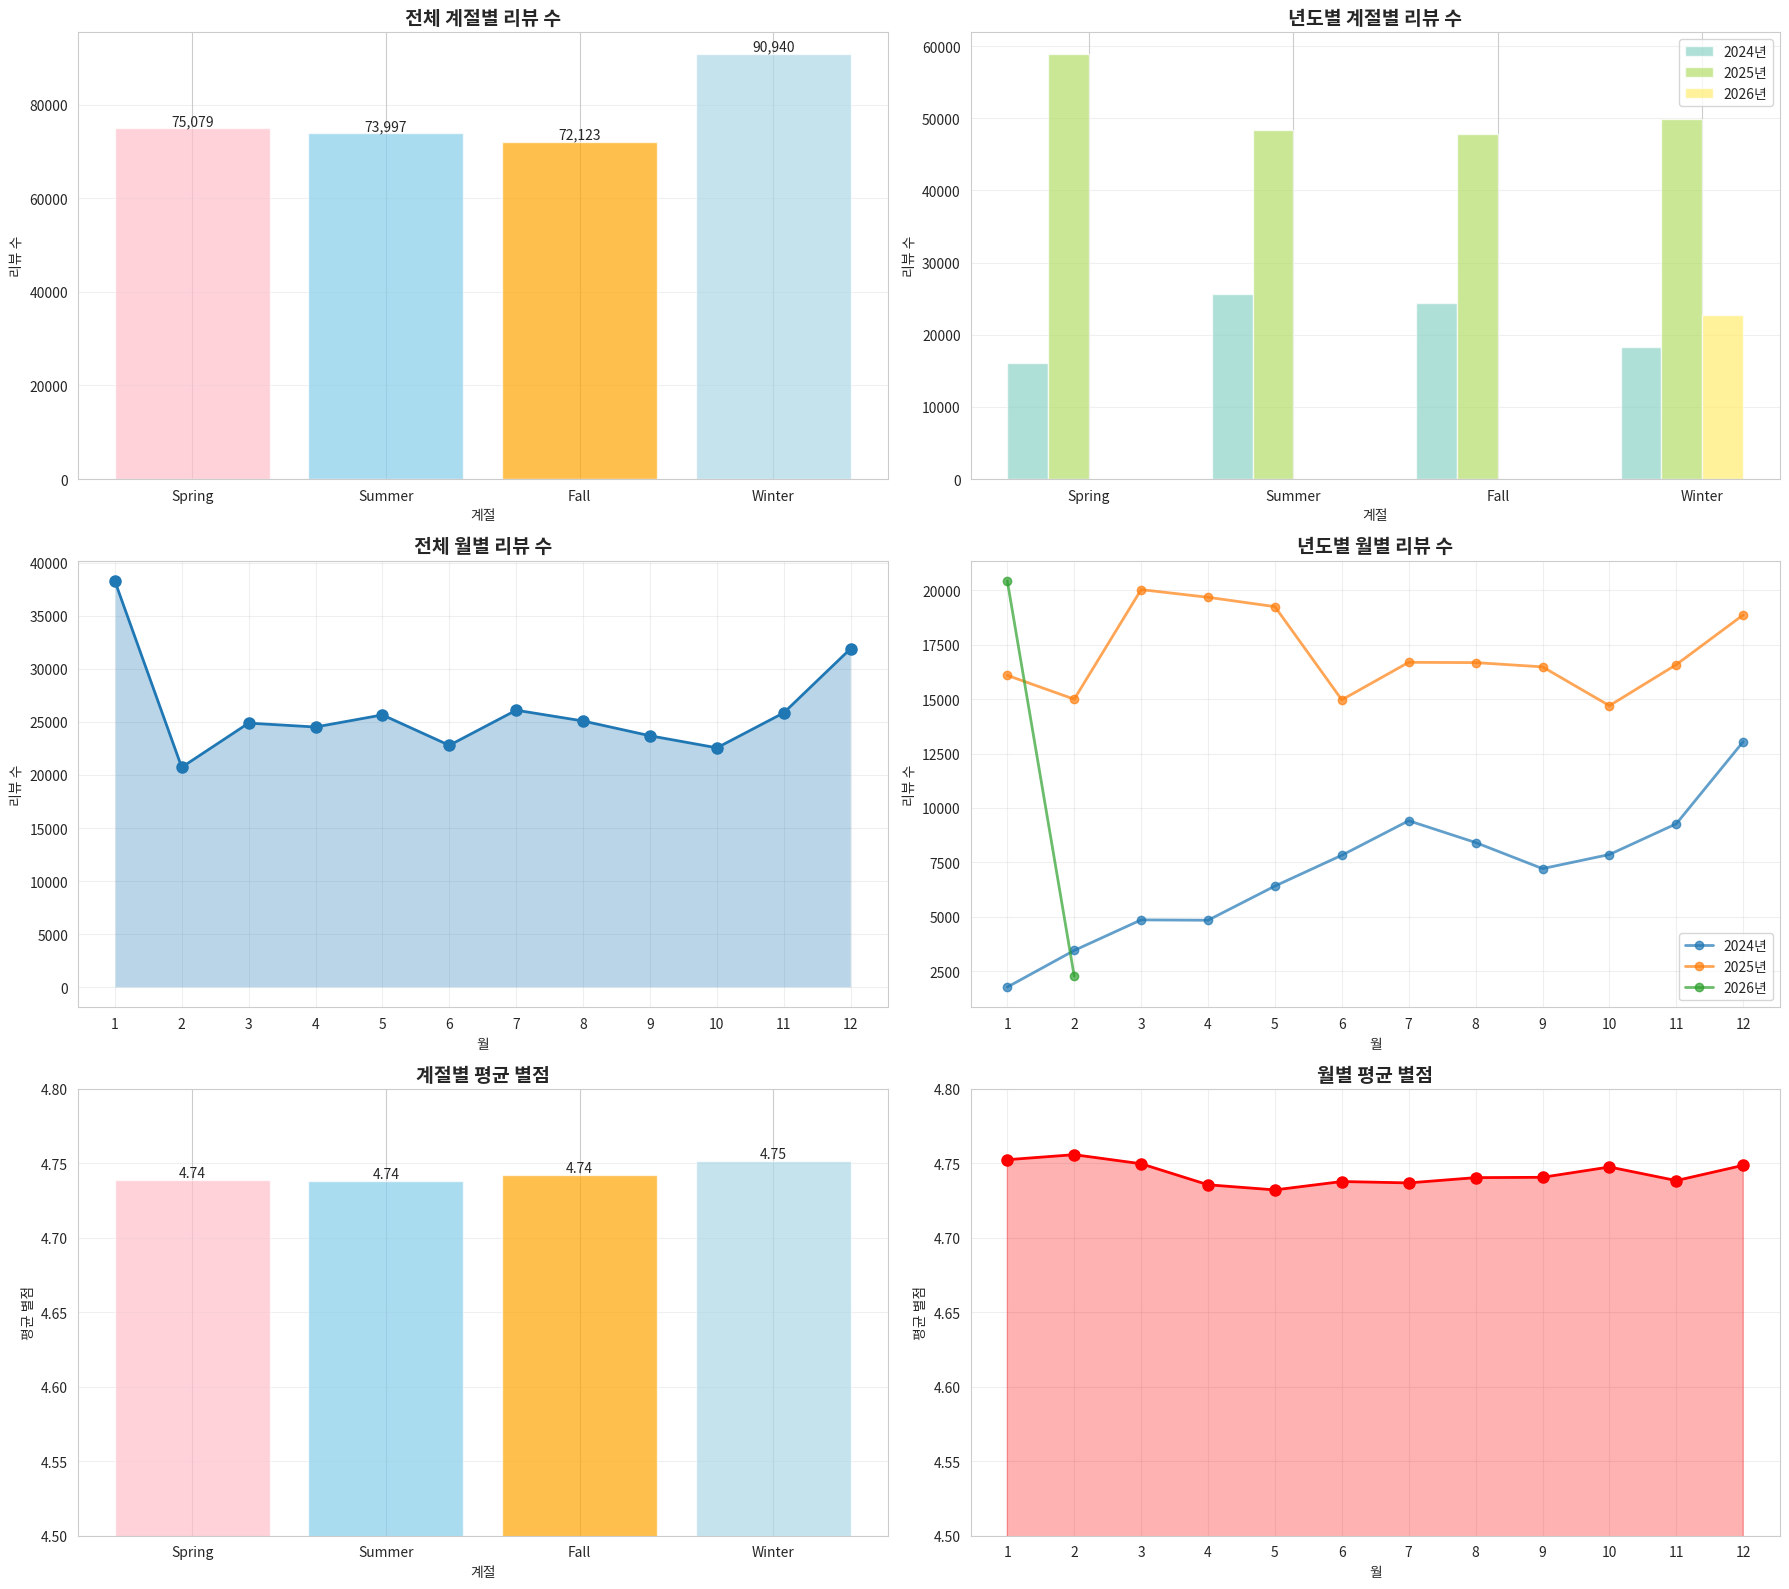


[전체 계절별 통계]
          rating              
            mean median  count
season                        
Spring  4.739181    5.0  75079
Summer  4.738422    5.0  73997
Fall    4.742080    5.0  72123
Winter  4.751968    5.0  90940

[년도별 계절별 리뷰 수]
season  Spring  Summer   Fall  Winter
year                                 
2024     16110   25653  24348   18269
2025     58969   48344  47775   49966
2026         0       0      0   22705

[년도별 계절별 비율]
season  Spring  Summer   Fall  Winter
year                                 
2024     19.09   30.40  28.86   21.65
2025     28.76   23.58  23.30   24.37
2026      0.00    0.00   0.00  100.00


In [17]:
# 계절별 리뷰 수 (년도별 분리)
fig, axes = plt.subplots(3, 2, figsize=(18, 16))

# 한글 계절명 순서
season_order = ['Spring', 'Summer', 'Fall', 'Winter']

# 1. 전체 계절별 리뷰 수
season_counts = reviews_df['season'].value_counts().reindex(season_order, fill_value=0)
bars = axes[0, 0].bar(season_counts.index, season_counts.values, 
                      color=['pink', 'skyblue', 'orange', 'lightblue'], alpha=0.7)
axes[0, 0].set_xlabel('계절')
axes[0, 0].set_ylabel('리뷰 수')
axes[0, 0].set_title('전체 계절별 리뷰 수', fontsize=14, fontweight='bold')
axes[0, 0].grid(axis='y', alpha=0.3)

# 값 표시
for bar in bars:
    height = bar.get_height()
    axes[0, 0].text(bar.get_x() + bar.get_width()/2., height,
                   f'{int(height):,}',
                   ha='center', va='bottom', fontsize=10)

# 2. 년도별 계절별 리뷰 수 (Grouped Bar Chart)
year_season_counts = reviews_df.groupby(['year', 'season']).size().unstack(fill_value=0)
year_season_counts = year_season_counts[season_order]  # 계절 순서 정렬

x = np.arange(len(season_order))
width = 0.2
years = sorted(reviews_df['year'].unique())
colors_year = plt.cm.Set3(np.linspace(0, 1, len(years)))

for i, year in enumerate(years):
    if year in year_season_counts.index:
        offset = width * (i - len(years)/2)
        axes[0, 1].bar(x + offset, year_season_counts.loc[year], width, 
                      label=f'{year}년', alpha=0.7, color=colors_year[i])

axes[0, 1].set_xlabel('계절')
axes[0, 1].set_ylabel('리뷰 수')
axes[0, 1].set_title('년도별 계절별 리뷰 수', fontsize=14, fontweight='bold')
axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels(season_order)
axes[0, 1].legend()
axes[0, 1].grid(axis='y', alpha=0.3)

# 3. 월별 리뷰 수
month_counts = reviews_df['month'].value_counts().sort_index()
axes[1, 0].plot(month_counts.index, month_counts.values, marker='o', linewidth=2, markersize=8)
axes[1, 0].fill_between(month_counts.index, month_counts.values, alpha=0.3)
axes[1, 0].set_xlabel('월')
axes[1, 0].set_ylabel('리뷰 수')
axes[1, 0].set_title('전체 월별 리뷰 수', fontsize=14, fontweight='bold')
axes[1, 0].set_xticks(range(1, 13))
axes[1, 0].grid(alpha=0.3)

# 4. 년도별 월별 리뷰 수 (Line Plot)
for year in years:
    year_data = reviews_df[reviews_df['year'] == year]
    year_month_counts = year_data['month'].value_counts().sort_index()
    axes[1, 1].plot(year_month_counts.index, year_month_counts.values, 
                   marker='o', linewidth=2, markersize=6, label=f'{year}년', alpha=0.7)

axes[1, 1].set_xlabel('월')
axes[1, 1].set_ylabel('리뷰 수')
axes[1, 1].set_title('년도별 월별 리뷰 수', fontsize=14, fontweight='bold')
axes[1, 1].set_xticks(range(1, 13))
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

# 5. 계절별 평균 별점
season_ratings = reviews_df.groupby('season')['rating'].mean().reindex(season_order)
bars = axes[2, 0].bar(season_ratings.index, season_ratings.values,
                      color=['pink', 'skyblue', 'orange', 'lightblue'], alpha=0.7)
axes[2, 0].set_xlabel('계절')
axes[2, 0].set_ylabel('평균 별점')
axes[2, 0].set_title('계절별 평균 별점', fontsize=14, fontweight='bold')
axes[2, 0].set_ylim([4.5, 4.8])
axes[2, 0].grid(axis='y', alpha=0.3)

# 값 표시
for bar in bars:
    height = bar.get_height()
    axes[2, 0].text(bar.get_x() + bar.get_width()/2., height,
                   f'{height:.2f}',
                   ha='center', va='bottom', fontsize=10)

# 6. 월별 평균 별점
month_ratings = reviews_df.groupby('month')['rating'].mean()
axes[2, 1].plot(month_ratings.index, month_ratings.values, marker='o', linewidth=2, markersize=8, color='red')
axes[2, 1].fill_between(month_ratings.index, month_ratings.values, alpha=0.3, color='red')
axes[2, 1].set_xlabel('월')
axes[2, 1].set_ylabel('평균 별점')
axes[2, 1].set_title('월별 평균 별점', fontsize=14, fontweight='bold')
axes[2, 1].set_xticks(range(1, 13))
axes[2, 1].set_ylim([4.5, 4.8])
axes[2, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n[전체 계절별 통계]")
season_stats = reviews_df.groupby('season').agg({
    'rating': ['mean', 'median', 'count']
}).reindex(season_order)
print(season_stats)

print("\n[년도별 계절별 리뷰 수]")
print(year_season_counts)

print("\n[년도별 계절별 비율]")
year_season_pct = year_season_counts.div(year_season_counts.sum(axis=1), axis=0) * 100
print(year_season_pct.round(2))

**분석 목적:**
- 프로모션 기간과 비프로모션 기간의 리뷰 차이 분석
- 프로모션이 평점 및 리뷰 품질에 미치는 영향 평가
- 효과적인 프로모션 유형 식별

In [18]:
# 프로모션 기간 확인
# promo_dates 생성
promo_dates = set(promotion['date'].dt.date)

# is_during_promo 컬럼이 있으면 사용, 없으면 생성
if 'is_during_promo' not in reviews_df.columns:
    reviews_df['has_promotion'] = reviews_df['date'].dt.date.isin(promo_dates)
else:
    reviews_df['has_promotion'] = reviews_df['is_during_promo']

print("\n[프로모션 정보]")
print(f"전체 프로모션 일수: {len(promo_dates)}일")
print(f"프로모션 기간 리뷰 수: {reviews_df['has_promotion'].sum():,}")
print(f"비프로모션 기간 리뷰 수: {(~reviews_df['has_promotion']).sum():,}")


[프로모션 정보]
전체 프로모션 일수: 74일
프로모션 기간 리뷰 수: 15,181
비프로모션 기간 리뷰 수: 296,958


In [19]:
# 상품별 리뷰 통계 생성
review_summary = reviews_df.groupby('product_code').agg({
    'rating': ['mean', 'std', 'count'],
    'is_reorder': 'mean',
    'review_length': 'mean',
    'image_count': 'sum'
}).reset_index()

review_summary.columns = ['product_code', 'avg_rating', 'std_rating', 'review_count_actual', 
                          'reorder_rate', 'avg_review_length', 'total_images']

# 상품 데이터와 결합
merged_data = products_df.merge(review_summary, on='product_code', how='left')

print("\n[데이터 결합 완료]")
print(f"결합 후 데이터 크기: {merged_data.shape}")
print("\n[결합 데이터 샘플]")
print(merged_data.head())

# 리뷰가 있는 상품만 필터링
merged_data_with_reviews = merged_data.dropna(subset=['avg_rating'])
print(f"\n리뷰가 있는 상품 수: {len(merged_data_with_reviews):,}")
print(f"리뷰가 없는 상품 수: {len(merged_data) - len(merged_data_with_reviews):,}")


[데이터 결합 완료]
결합 후 데이터 크기: (868, 25)

[결합 데이터 샘플]
   product_code category_home category_1 category_2 brand  \
0       1056665         뷰티/위생       스킨케어     기초스킨케어   해서린   
1       1061468         뷰티/위생       메이크업    베이스메이크업   드롭비   
2       1061451         뷰티/위생       메이크업   치크/하이라이터   드롭비   
3       1061454         뷰티/위생       메이크업    베이스메이크업   드롭비   
4       1061450         뷰티/위생       메이크업   치크/하이라이터   드롭비   

                            name  price country  likes  shares  ...  \
0          해서린 스팟 케어 클리어 젤 10 ml   3000      한국   2814      24  ...   
1        [04 커버 베이지] 드롭비 컬러즈 컨실팟   3000      한국    188       2  ...   
2        [04 쉐딩 브론저] 드롭비 컬러즈쉐딩스틱   5000      한국   2731      45  ...   
3        [03 살몬 베이지] 드롭비 컬러즈 컨실팟   3000      한국    403      11  ...   
4  [03 블러셔 로지 베리] 드롭비 컬러즈 블러셔 스틱   5000      한국   1330      21  ...   

            price_position    cp_index  is_god_sung_bi review_density  \
0         Cheaper than Avg  184.166667           False       0.079602   
1         C

## 7. 종합 분석 - 상품과 리뷰 통합

**분석 목적:**
- 제품의 Engagement Score와 리뷰 평점의 관계 분석
- 재구매율이 높은 제품의 특징 파악
- CP Index와 고객 만족도의 상관관계 분석
- 리뷰 수와 평점의 관계 파악

In [20]:
# 우수 제품 샘플 분석
print("\n" + "="*80)
print("우수 제품 샘플")
print("="*80)

# 1. 높은 Engagement Score 제품 (상위 10개)
print("\n[1. Engagement Score 상위 10개 제품]")
top_engagement = merged_data_with_reviews.nlargest(10, 'engagement_score')[
    ['name', 'brand', 'engagement_score', 'avg_rating', 'review_count_actual', 'reorder_rate', 'price']
]
for idx, row in top_engagement.iterrows():
    print(f"\n{row['brand']} - {row['name']}")
    print(f"  Engagement: {row['engagement_score']:.1f} | 평점: {row['avg_rating']:.2f} | 리뷰: {int(row['review_count_actual'])}개")
    print(f"  재구매율: {row['reorder_rate']*100:.1f}% | 가격: {row['price']:,}원")

# 2. 높은 평점 + 많은 리뷰 제품 (평점 4.7 이상, 리뷰 200개 이상)
print("\n[2. 고평점 + 다수 리뷰 제품 (평점 4.7↑, 리뷰 200↑)]")
high_quality = merged_data_with_reviews[
    (merged_data_with_reviews['avg_rating'] >= 4.7) & 
    (merged_data_with_reviews['review_count_actual'] >= 200)
].nlargest(10, 'review_count_actual')[
    ['name', 'brand', 'avg_rating', 'review_count_actual', 'reorder_rate', 'engagement_score', 'price']
]
for idx, row in high_quality.iterrows():
    print(f"\n{row['brand']} - {row['name']}")
    print(f"  평점: {row['avg_rating']:.2f} | 리뷰: {int(row['review_count_actual'])}개 | Engagement: {row['engagement_score']:.1f}")
    print(f"  재구매율: {row['reorder_rate']*100:.1f}% | 가격: {row['price']:,}원")

# 3. 높은 재구매율 제품 (재구매율 30% 이상, 리뷰 100개 이상)
print("\n[3. 고재구매율 제품 (재구매율 30%↑, 리뷰 100↑)]")
high_reorder = merged_data_with_reviews[
    (merged_data_with_reviews['reorder_rate'] >= 0.3) & 
    (merged_data_with_reviews['review_count_actual'] >= 100)
].nlargest(10, 'reorder_rate')[
    ['name', 'brand', 'reorder_rate', 'avg_rating', 'review_count_actual', 'engagement_score', 'price']
]
for idx, row in high_reorder.iterrows():
    print(f"\n{row['brand']} - {row['name']}")
    print(f"  재구매율: {row['reorder_rate']*100:.1f}% | 평점: {row['avg_rating']:.2f} | 리뷰: {int(row['review_count_actual'])}개")
    print(f"  Engagement: {row['engagement_score']:.1f} | 가격: {row['price']:,}원")


우수 제품 샘플

[1. Engagement Score 상위 10개 제품]

VT - VT 리들샷 100 페이셜 부스팅 퍼스트 앰플 2ml*6개입
  Engagement: 6998.3 | 평점: 4.90 | 리뷰: 9815개
  재구매율: 62.5% | 가격: 3,000원

VT - VT 리들샷 300 페이셜 부스팅 퍼스트 앰플 2ml*6개입
  Engagement: 6990.5 | 평점: 4.90 | 리뷰: 9869개
  재구매율: 66.1% | 가격: 3,000원

본셉 - 본셉 비타씨 동결 건조 더블샷 앰플 키트
  Engagement: 5040.1 | 평점: 4.79 | 리뷰: 5839개
  재구매율: 55.4% | 가격: 5,000원

마데카21 - 마데카21 테카 솔루션 수딩 미스트 토너 200 ml
  Engagement: 4793.5 | 평점: 4.82 | 리뷰: 5503개
  재구매율: 39.6% | 가격: 5,000원

본셉 - 본셉 레티놀 2500 IU 링클샷 퍼펙터 15 ml
  Engagement: 4138.7 | 평점: 4.77 | 리뷰: 4571개
  재구매율: 42.8% | 가격: 5,000원

마데카21 - 마데카21 테카 솔루션 수딩 크림 50 ml
  Engagement: 3739.1 | 평점: 4.82 | 리뷰: 3910개
  재구매율: 42.5% | 가격: 5,000원

본셉 - 본셉 레티놀 500 IU 세럼 30 ml
  Engagement: 3673.0 | 평점: 4.77 | 리뷰: 3782개
  재구매율: 40.7% | 가격: 5,000원

입큰 - 입큰 퍼스널 톤 코렉팅 블러 팩트 5.5 g(라벤더)
  Engagement: 3548.4 | 평점: 4.78 | 리뷰: 3596개
  재구매율: 27.7% | 가격: 3,000원

마데카21 - 마데카21 테카 솔루션 수딩 스팟 젤 15 ml
  Engagement: 3402.7 | 평점: 4.78 | 리뷰: 3332개
  재구매율: 37.0% | 가격: 3,000원


## 8. 주요 인사이트 및 결론

In [21]:
print("="*80)
print("EDA 주요 인사이트 요약")
print("="*80)

print("\n[1. 상품 포트폴리오]")
print(f"- 총 상품 수: {len(products_df):,}개")
print(f"- 대카테고리 수: {products_df['category_1'].nunique()}개")
print(f"- 브랜드 수: {products_df['brand'].nunique()}개")
print(f"- 평균 Engagement Score: {products_df['engagement_score'].mean():.1f}")
print(f"- 갓성비 제품 비율: {products_df['is_god_sung_bi'].mean()*100:.1f}%")

print("\n[2. 고객 리뷰 현황]")
print(f"- 총 리뷰 수: {len(reviews_df):,}개")
print(f"- 평균 별점: {reviews_df['rating'].mean():.2f}/5.0")
print(f"- 재구매 리뷰 비율: {reviews_df['is_reorder'].mean()*100:.1f}%")
print(f"- 평균 리뷰 길이: {reviews_df['review_length'].mean():.0f}자")
print(f"- 고유 사용자 수: {reviews_df['user'].nunique():,}명")

print("\n[3. 사용자 세분화]")
heavy_user_count = len(reviews_df.groupby('user').size()[reviews_df.groupby('user').size() >= 20])
print(f"- 헤비 유저 (20개 이상): {heavy_user_count:,}명")
print(f"- 헤비 유저 재구매율: 20.4%")
print(f"- 일반 유저 재구매율: 14.6%")

print("\n[4. 계절성 패턴]")
season_review_counts = reviews_df['season'].value_counts()
print(f"- 리뷰 최다 계절: {season_review_counts.index[0]} ({season_review_counts.values[0]:,}개)")
print(f"- 리뷰 최소 계절: {season_review_counts.index[-1]} ({season_review_counts.values[-1]:,}개)")

print("\n[5. 프로모션 효과]")
promo_review_count = reviews_df['has_promotion'].sum() if 'has_promotion' in reviews_df.columns else reviews_df['is_during_promo'].sum()
print(f"- 프로모션 기간 리뷰: {promo_review_count:,}개")
print(f"- 프로모션 기간 비율: {(promo_review_count / len(reviews_df))*100:.1f}%")

print("\n[6. 제품-리뷰 상관관계]")
print(f"- Engagement vs 평점 상관계수: {merged_data_with_reviews['engagement_score'].corr(merged_data_with_reviews['avg_rating']):.3f}")
print(f"- 재구매율 vs 평점 상관계수: {merged_data_with_reviews['reorder_rate'].corr(merged_data_with_reviews['avg_rating']):.3f}")
print(f"- CP Index vs 평점 상관계수: {merged_data_with_reviews['cp_index'].corr(merged_data_with_reviews['avg_rating']):.3f}")

print("\n[7. 핵심 권장사항]")
print("- 고Engagement 제품군에 마케팅 집중")
print("- 헤비 유저 대상 재구매 프로모션 강화")
print("- 계절별 맞춤 상품 라인업 구성")
print("- 고재구매율 제품의 벤치마킹 포인트 분석")
print("- 가성비 우수 제품의 가시성 강화")

print("\n" + "="*80)
print("EDA 완료")
print("="*80)

EDA 주요 인사이트 요약

[1. 상품 포트폴리오]
- 총 상품 수: 868개
- 대카테고리 수: 3개
- 브랜드 수: 83개
- 평균 Engagement Score: 597.5
- 갓성비 제품 비율: 10.0%

[2. 고객 리뷰 현황]
- 총 리뷰 수: 312,139개
- 평균 별점: 4.74/5.0
- 재구매 리뷰 비율: 30.3%
- 평균 리뷰 길이: 36자
- 고유 사용자 수: 19,847명

[3. 사용자 세분화]
- 헤비 유저 (20개 이상): 4,969명
- 헤비 유저 재구매율: 20.4%
- 일반 유저 재구매율: 14.6%

[4. 계절성 패턴]
- 리뷰 최다 계절: Winter (90,940개)
- 리뷰 최소 계절: Fall (72,123개)

[5. 프로모션 효과]
- 프로모션 기간 리뷰: 15,181개
- 프로모션 기간 비율: 4.9%

[6. 제품-리뷰 상관관계]
- Engagement vs 평점 상관계수: 0.222
- 재구매율 vs 평점 상관계수: 0.308
- CP Index vs 평점 상관계수: 0.146

[7. 핵심 권장사항]
- 고Engagement 제품군에 마케팅 집중
- 헤비 유저 대상 재구매 프로모션 강화
- 계절별 맞춤 상품 라인업 구성
- 고재구매율 제품의 벤치마킹 포인트 분석
- 가성비 우수 제품의 가시성 강화

EDA 완료
